In [23]:
# %pip install numpy pandas matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [24]:
# Load dataset
df = pd.read_csv("/content/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [25]:
# Data Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  float64
 10  isFlaggedFraud  179013 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.0+ MB
None
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  179014.000000  1.790140e+05   1.790130e+05    1.790130e+05   
mean        9.739222  1.801320e+05   8.915856e+05    9.089488e+05   
std         1.99

In [26]:
# Check for missing values
print(df.isnull().sum())     #there are no missing values, we can proceed with data preprocessing, feature engineering, and model training.

step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [27]:
print(f"Duplicate rows: {df.duplicated().sum()}")
#there are no duplicate rows, we can move forward with data exploration, feature engineering, and model training.


Duplicate rows: 0


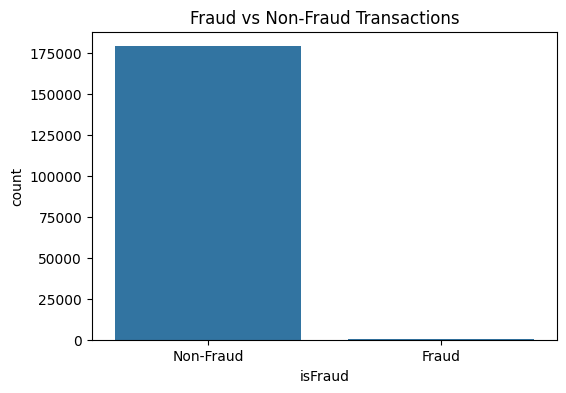

In [28]:
#Check for Class Imbalance (Fraud vs Non-Fraud Transactions)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=df['isFraud'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()



#Fraud vs Non-Fraud Transactions bar chart clearly shows extreme class imbalance. Fraudulent transactions are significantly fewer
# compared to non-fraudulent ones.

In [29]:
print(df['isFraud'].value_counts())

isFraud
0.0    178874
1.0       139
Name: count, dtype: int64


# Steps to Handle Imbalance
- Separate Features and Target → Extract X (independent variables) and y (target variable).

- Split Data → Use train_test_split() to split data into training and testing sets.

- Apply SMOTE (Oversampling) → Generate synthetic fraud cases to balance classes.

- Apply Undersampling → Reduce the number of non-fraud cases to improve balance.

- Train ML Model → Train a classifier on the balanced dataset.

In [30]:
# SMOTE → Adds synthetic fraud cases to balance the dataset.

# Random Undersampling → Removes some non-fraud cases to improve balance.

# Pipeline → Ensures data transformation is done seamlessly.

# Install the imbalanced-learn package
# %pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import for encoding categorical data



In [31]:
# Step 1: Encode categorical feature ('type')
#Data Preprocessing
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
179009,12,0,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0,0.0
179010,12,0,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0,0.0
179011,12,0,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0,0.0
179012,12,0,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,0.0,0.0


In [32]:
# Step 2: Extract Features (X) and Target (y)
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']


In [33]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0.0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0.0
2,1,4,181.00,181.00,0.00,0.00,0.00,0.0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0.0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
179009,12,0,200271.90,3896164.44,4096436.33,531167.90,690790.44,0.0
179010,12,0,266616.13,4096436.33,4363052.46,6064698.49,6080565.41,0.0
179011,12,0,194735.24,4363052.46,4557787.70,288407.25,152597.27,0.0
179012,12,0,61212.03,4557787.70,4618999.73,2492638.18,2620615.37,0.0


In [34]:
y

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
179009,0.0
179010,0.0
179011,0.0
179012,0.0


In [35]:
print(pd.isnull(y).sum())  # Check the number of NaN values in y
X = X[~pd.isnull(y)]
y = y.dropna()


1


In [36]:
y.fillna(y.mode()[0], inplace=True)  # Replace NaN with the most frequent class
y.fillna("Unknown", inplace=True)  # Replace NaN with a placeholder


In [37]:
# Step 3: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
# Step 4: Apply SMOTE + Undersampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)


In [39]:
# Step 5: Create Pipeline and Fit
resampling_pipeline = Pipeline([('smote', smote), ('undersample', undersample)])
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)


In [40]:
# Print Class Distribution After Resampling
print("Before Resampling:\n", y_train.value_counts())
print("After Resampling:\n", pd.Series(y_train_resampled).value_counts())


Before Resampling:
 isFraud
0.0    143099
1.0       111
Name: count, dtype: int64
After Resampling:
 isFraud
0.0    143098
1.0     71549
Name: count, dtype: int64


In [41]:
#Feature Scaling & Data Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same transformation to test data



In [43]:
#Train Fraud Detection Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the resampled training data
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     35775
         1.0       0.01      0.79      0.02        28

    accuracy                           0.95     35803
   macro avg       0.51      0.87      0.50     35803
weighted avg       1.00      0.95      0.97     35803



In [44]:
# %pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35775
         1.0       0.26      0.86      0.40        28

    accuracy                           1.00     35803
   macro avg       0.63      0.93      0.70     35803
weighted avg       1.00      1.00      1.00     35803



In [45]:
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb_adjusted = (y_pred_xgb_prob > 0.3).astype(int)  # Adjust threshold to 0.3 or other values


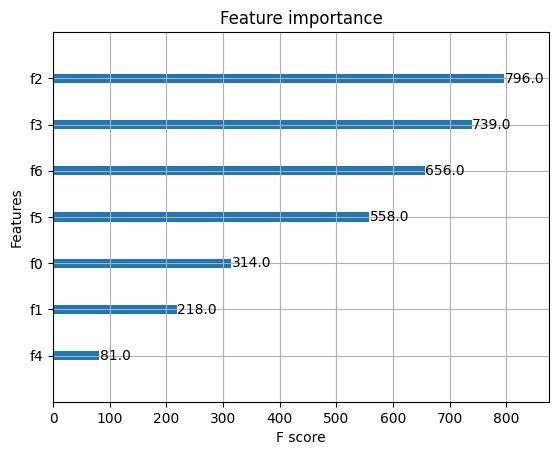

In [46]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import xgboost as xgb
from collections import Counter

# Apply SMOTE to balance classes
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Calculate scale_pos_weight using ORIGINAL dataset
scale_pos_weight = Counter(y_train)[0] / Counter(y_train)[1]

param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],  # Reduced depth
    'subsample': np.linspace(0.7, 0.9, 3),
    'colsample_bytree': np.linspace(0.7, 0.9, 3),
    'min_child_weight': [1, 3, 5],  # Regularization
    'gamma': [0, 0.1, 0.3]  # Prevent overfitting
}

random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight),
    param_distributions=param_dist,
    n_iter=100, cv=3,  # Increased iterations
    scoring='roc_auc',
    n_jobs=-1, verbose=2,
    random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and model
print("Best Hyperparameters:", random_search.best_params_)
best_xgb_model = random_search.best_estimator_

# Predictions and classification report
y_pred_probs = best_xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.2  # Lowered threshold
y_pred_adjusted = (y_pred_probs > threshold).astype(int)

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))
print(classification_report(y_test, y_pred_adjusted))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'subsample': np.float64(0.9), 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': np.float64(0.2), 'gamma': 0, 'colsample_bytree': np.float64(0.8)}
ROC AUC Score: 0.745308974742937
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35775
         1.0       0.00      0.00      0.00        28

    accuracy                           1.00     35803
   macro avg       0.50      0.50      0.50     35803
weighted avg       1.00      1.00      1.00     35803



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


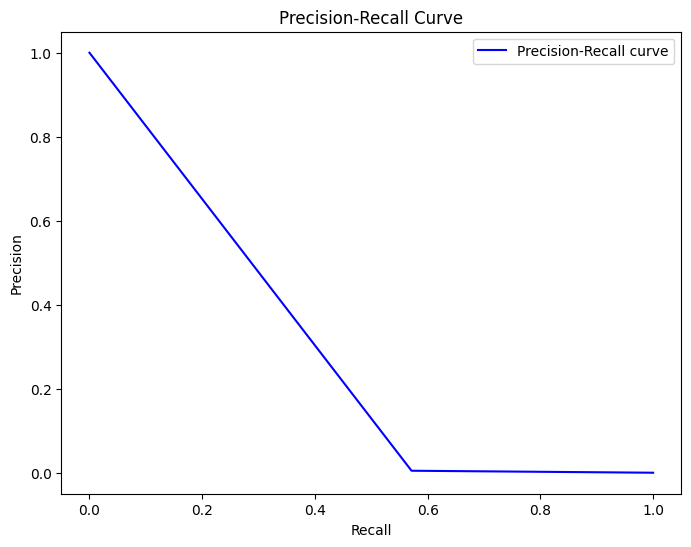

In [51]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()
